<a href="https://colab.research.google.com/github/deniz2104/Classifiers_LogisticRegression/blob/main/Classifiers_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary classification. Logistic Regression.

**Logistic regression** is a statistical method for analyzing datasets in which there are one or more independent variables that determine an outcome. The outcome is usually a binary outcome (1/0, Yes/No, True/False). It's used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

While linear regression predicts a continuous outcome, logistic regression predicts the probability of an event occurrence. The hypothesis function for logistic regression is

\begin{equation}
h_\theta(x) = \frac{1}{1 + e^{-\theta^\top x}} = \sigma(\theta^\top x) \tag{1}
\end{equation}

where:
- $ h_\theta(x) $ is the predicted output
- $ \theta $ is the set of parameters
- $ x $ is the input feature
- The function $ \frac{1}{1 + e^{-z}} $ is the Sigmoid function, which outputs values between 0 and 1.



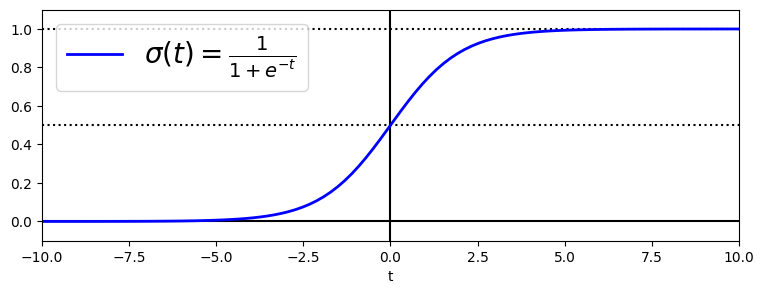

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

As mentioned the logistic regresion returns the probability of an event to occure. So we make the following interpretation:

\begin{equation}
h_\theta(X) = \frac{1}{1 + e^{-\theta^\top X}} = P(y=1|X, \theta)
\end{equation}

Considering the fundamental theory of probabilities, i.e., the sum of the probabilities is one, we have:

\begin{equation}
P(y=0|X, \theta) = 1- P(y=0|X, \theta).
\end{equation}

Further, in order to compute the *Likelihood function*, we assume that the instances are indepedent and have the Bernoulli distribution. Thus, we obtain:
$$
\begin{aligned}
L(\theta \mid y, x) & =\mathrm{P}(Y \mid X, \theta)=\prod_{i=1}^m \mathrm{P}\left(y^{(i)} \mid x^{(i)}, \theta\right) =\prod_{i=1}^m h_\theta\left(x^{(i)}\right)^{y^{(i)}}\left(1-h_\theta\left(x^{(i)}\right)\right)^{\left(1-y^{(i)}\right)} .
\end{aligned}
$$

Further, we take the logarithm in the previous expression and maximize it:
$$
\hat{\theta} = \text{argmax}_{\theta} \frac{1}{m}\sum_{i=1}^m \log  h_\theta\left(x^{(i)}\right)^{y^{(i)}} + \log \left(1-h_\theta\left(x^{(i)}\right)\right)^{\left(1-y^{(i)}\right)}
$$

To train a logistic regression model, we need to find parameters $ \theta $ such that the cost function is minimized

\begin{equation}
J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] \tag{2}
\end{equation}

where $ m $ is the number of training examples and $y$ is the label. One method to find the optimal parameters is the gradient method. Further, we provide the ingredients for implementing the GD method.

The gradient of the cost function is:
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \tag{3}
\end{equation}

Logistic regression optimization using gradient descent revolves around minimizing the log-loss, a measure of the difference between predicted probabilities and actual labels. The key to this iterative optimization is computing the gradient of the cost with respect to the model's weights. The gradient, given by

\begin{equation}
\nabla J(\theta) = \frac{1}{m} X^T (\sigma(X\theta) - y)
\end{equation}

where $ \sigma $ is the sigmoid function, indicates the direction of steepest ascent in the cost function. To minimize the cost, weights are updated in the direction opposite to the gradient using the formula

\begin{equation}
\theta_{k + 1} = \theta_{k} - \alpha \nabla J(\theta_{k})
\end{equation}

Here, $ \alpha $ is the learning rate, determining the step size. The process is repeated until the changes in the cost function become negligible or a set number of iterations is reached. Adjusting the learning rate is crucial: a high value can cause divergence, while a low value may lead to slow convergence. There are also more reliable methods for choosing the learning rate, such as the **Lipschitz constant** (for constant value) or variable step.

For the data base Iris,I use the logistic regression classification to separate the data. Split the data in 15% for testing and the rest for training using the function [train_test_split](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html). Implementing Stochastic gradient descent for solving the optimization problem.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy import linalg as LA
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 2:]  # petal width
y = (iris["target"] == 2).astype(np.int32)  # 1 if Iris virginica, else 0

loss_history = []
accuracy_history = []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, theta):
    h = sigmoid(np.dot(X, theta))
    return -np.mean(y * np.log(h+1e-15) + (1 - y) * np.log(1 - h+ 1e-15))

def compute_accuracy(X, y, theta):
    preds = (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)
    return np.mean(preds == y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

theta=np.zeros(X_train.shape[1])
C=1000
m=X_train.shape[0]

max_iter=10000

for i in range(max_iter):
    idx=np.random.randint(m)
    xi=X_train[idx]
    yi=y_train[idx]
    h=1/(1+np.exp(-np.dot(theta,xi)))

    alpha=C/(C+i)

    grad=(h-yi)*xi
    next_theta=theta-alpha*grad

    loss = compute_loss(X_train, y_train, theta)
    acc = compute_accuracy(X_train, y_train, theta)
    loss_history.append(loss)
    accuracy_history.append(acc)

    if(LA.norm(next_theta-theta)<0.00001):
        break

    theta=next_theta
    ##Decomment for plotting (too many photos)

    ##fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ##ax[0].plot(range(len(loss_history)), loss_history, label="Loss")
    ##ax[0].set_title("Loss over Iterations")
    ##ax[0].set_xlabel("Iterations")
    ##ax[0].set_ylabel("Loss")
    ##ax[0].legend()

    ##ax[1].plot(range(len(accuracy_history)), accuracy_history, label="Accuracy", color="red")
    ##ax[1].set_title("Accuracy over Iterations")
    ##ax[1].set_xlabel("Iterations")
    ##ax[1].set_ylabel("Accuracy")
    ##ax[1].legend()

    ##plt.tight_layout()
    ##plt.show()


## Support Vector Machine

Support Vector Machine (SVM) is a robust supervised machine learning algorithm primarily used for binary classification tasks, where the goal is to classify data points into one of two classes, typically labeled as +1 and -1. SVM aims to find a hyperplane that best separates the data into these two classes while maximizing the margin between them. We will concentrate on two main variants of the SVM algorithm: hard-margin and soft-margin.

### Hard-margin SVM

The Hard-margin SVM aims to find a hyperplane that perfectly separates the training data into two classes with no margin violations. This method is ideal for datasets in which the data is linearly separable.

Suppose we have training examples $(x_i, y_i)$, where $x_i$ is a feature vector and $y_i \in \{-1, 1\}$ is the class label. We want to find a hyperplane defined by $w \cdot x + b = 0$, where $w$ is the normal to the hyperplane and $b$ is a bias term.

The constraints for the hard-margin SVM are:
 - for each data point classified as 1 ($y_i = 1$): $w \cdot x_i + b \geq 1$.
 - for each data point classified as -1 ($y_i = -1$): $w \cdot x_i + b \leq -1$.

These constraints ensure that all points are correctly classified with a margin. The optimization problem then becomes minimizing $\|w\|^2$ (equivalent to maximizing the margin), subject to the above constraints.

The main problem can be formulated as follows
- Minimize:
\begin{equation}
\frac{1}{2} ||w||^2
\end{equation}

- Subject to:
\begin{equation}
y_i(w \cdot x_i + b) \geq 1, \quad \forall i
\end{equation}

Here, $w$ is the weight vector, $b$ is the bias term, $x_i$ are the training data points, and $y_i$ are their corresponding labels (+1 or -1).

### Soft-margin SVM

In the Soft-margin SVM, we allow some margin violations to account for noisy or overlapping data. The objective is to find a hyperplane separating the data with as few violations as possible while maximizing the margin and penalizing violations.

Soft-margin SVM is used when the data is not linearly separable. We introduce a slack variable $\xi_i$ for each data point to allow misclassification. The mathematical formulation is:

 - Minimize:
\begin{equation}
\frac{1}{2} ||w||^2 + C \sum_{i=1}^{N} \xi_i
\end{equation}

 - Subject to:
\begin{equation}
y_i(w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i
\end{equation}

Where $C$ is a hyperparameter that controls the trade-off between maximizing the margin and minimizing violations, and $\xi_i$ are slack variables representing each data point's degree of violation.


To solve the primal problem is more computational expensive then the dual formulation (please see the course)

----

In conclusion, SVM is a powerful algorithm for linear classification, and its soft-margin variant is advantageous when dealing with real-world data that may need to be more perfectly separable.

For problems that involve nonlinear data (which are not linearly separable), the SVM problem can be improved using the kernel trick you learned in the previous laboratory (**Kernel Methods**).


For the data base Iris, I m using the SVM classification to separate the data. First split the data in 15% for testing and the rest for training using the function [train_test_split](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html).I make the suitable adjustments for the label variable.
Using the [SVC](https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html) class to implement the SVM classifier.Lastly,I analyse the performance of the classifier for differents $C$.



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Incarcarea setului de date
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Analizam sa vedem daca avem parte de fenomenul de overfitting sau underfitting
svm_linear_model_1 = SVC(C=0.01, kernel='linear')
svm_linear_model_1.fit(X_train_scaled, y_train)
y_pred_linear_svm_1 = svm_linear_model_1.predict(X_train_scaled)
accuracy_linear_svm_1 = accuracy_score(y_train, y_pred_linear_svm_1)

svm_linear_model_2 = SVC(C=0.5, kernel='linear')
svm_linear_model_2.fit(X_train_scaled, y_train)
y_pred_linear_svm_2 = svm_linear_model_2.predict(X_train_scaled)
accuracy_linear_svm_2 = accuracy_score(y_train, y_pred_linear_svm_2)

svm_linear_model_3 = SVC(C=10, kernel='linear')
svm_linear_model_3.fit(X_train_scaled, y_train)
y_pred_linear_svm_3 = svm_linear_model_3.predict(X_train_scaled)
accuracy_linear_svm_3 = accuracy_score(y_train, y_pred_linear_svm_3)

#Dupa ce am vazut daca datele au potential de overfitting analizam indicii de performanta pentru fiecare parametrizare

svm_linear_model_10 = SVC(C=0.01, kernel='linear')
svm_linear_model_10.fit(X_train_scaled, y_train)
y_pred_linear_svm_10 = svm_linear_model_10.predict(X_test_scaled)
accuracy_linear_svm_10 = accuracy_score(y_test, y_pred_linear_svm_10)

svm_linear_model_20 = SVC(C=0.5, kernel='linear')
svm_linear_model_20.fit(X_train_scaled, y_train)
y_pred_linear_svm_20 = svm_linear_model_20.predict(X_test_scaled)
accuracy_linear_svm_20 = accuracy_score(y_test, y_pred_linear_svm_20)

svm_linear_model_30 = SVC(C=10, kernel='linear')
svm_linear_model_30.fit(X_train_scaled, y_train)
y_pred_linear_svm_30 = svm_linear_model_30.predict(X_test_scaled)
accuracy_linear_svm_30 = accuracy_score(y_test, y_pred_linear_svm_30)

svm_rbf_model_1 = SVC(C=0.01, kernel='rbf')
svm_rbf_model_1.fit(X_train_scaled, y_train)
y_pred_rbf_svm_1 = svm_rbf_model_1.predict(X_test_scaled)
accuracy_rbf_svm_1 = accuracy_score(y_test, y_pred_rbf_svm_1)

svm_rbf_model_2 = SVC(C=0.5, kernel='rbf')
svm_rbf_model_2.fit(X_train_scaled, y_train)
y_pred_rbf_svm_2 = svm_rbf_model_2.predict(X_test_scaled)
accuracy_rbf_svm_2 = accuracy_score(y_test, y_pred_rbf_svm_2)

svm_rbf_model_3 = SVC(C=10, kernel='rbf')
svm_rbf_model_3.fit(X_train_scaled, y_train)
y_pred_rbf_svm_3 = svm_rbf_model_3.predict(X_test_scaled)
accuracy_rbf_svm_3 = accuracy_score(y_test, y_pred_rbf_svm_3)

svm_poly_model_1 = SVC(C=0.01, kernel='poly', degree=3)
svm_poly_model_1.fit(X_train_scaled, y_train)
y_pred_poly_svm_1 = svm_poly_model_1.predict(X_test_scaled)
accuracy_poly_svm_1 = accuracy_score(y_test, y_pred_poly_svm_1)

svm_poly_model_2 = SVC(C=0.5, kernel='poly', degree=3)
svm_poly_model_2.fit(X_train_scaled, y_train)
y_pred_poly_svm_2 = svm_poly_model_2.predict(X_test_scaled)
accuracy_poly_svm_2 = accuracy_score(y_test, y_pred_poly_svm_2)

svm_poly_model_3 = SVC(C=10, kernel='poly', degree=3)
svm_poly_model_3.fit(X_train_scaled, y_train)
y_pred_poly_svm_3 = svm_poly_model_3.predict(X_test_scaled)
accuracy_poly_svm_3 = accuracy_score(y_test, y_pred_poly_svm_3)


# Results
print("Accuracy of models:")
print(f"Linear SVM (C=0.01): {accuracy_linear_svm_1}")
print(f"Linear SVM (C=0.5): {accuracy_linear_svm_2}")
print(f"Linear SVM (C=10): {accuracy_linear_svm_3}")
print(f"Linear SVM (C=0.01): {accuracy_linear_svm_10}")
print(f"Linear SVM (C=0.5): {accuracy_linear_svm_20}")
print(f"Linear SVM (C=10): {accuracy_linear_svm_30}")
print(f"RBF SVM (C=0.01): {accuracy_rbf_svm_1}")
print(f"RBF SVM (C=0.5): {accuracy_rbf_svm_2}")
print(f"RBF SVM (C=0.10): {accuracy_rbf_svm_3}")
print(f"Poly SVM (C=0.01): {accuracy_poly_svm_1}")
print(f"Poly SVM (C=0.5): {accuracy_poly_svm_2}")
print(f"Poly SVM (C=10): {accuracy_poly_svm_3}")


Accuracy of models:
Linear SVM (C=0.01): 0.889763779527559
Linear SVM (C=0.5): 0.9921259842519685
Linear SVM (C=10): 0.984251968503937
Linear SVM (C=0.01): 0.9130434782608695
Linear SVM (C=0.5): 0.8695652173913043
Linear SVM (C=10): 0.9130434782608695
RBF SVM (C=0.01): 0.30434782608695654
RBF SVM (C=0.5): 0.8695652173913043
RBF SVM (C=0.10): 0.8695652173913043
Poly SVM (C=0.01): 0.6521739130434783
Poly SVM (C=0.5): 0.9565217391304348
Poly SVM (C=10): 0.8695652173913043


#Extra
##Detecting how many survivors are in the case of the titanic based on sex,class and age
## Dataset link:https://www.kaggle.com/datasets/pavlofesenko/titanic-extended/

Predicted labels: [0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0]
Actual labels   : [0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        81
           1       0.66      0.70      0.68        53

    accuracy                           0.74       134
   macro avg       0.73      0.73      0.73       134
weighted avg       0.74      0.74      0.74       134

Linear SVM Accuracy: 0.753731343283582
Linear Regression Accuracy:

<Axes: title={'center': 'Supraviețuitori'}, ylabel='Frequency'>

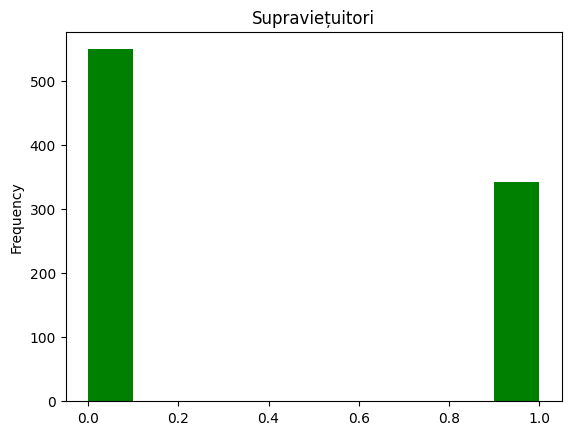

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

df = pd.read_csv("/content/train.csv",header=0) #citesc valorile din fisier

X = np.zeros((len(df), 3))
y = df["Survived"].values #populez vectorul cu labels, pentru supraviețuitor 1 pentru decedat 0

X[:, 0] = df["Age_wiki"].values # populez prima coloană din matricea X cu vârsta persoanei
X[:, 1] = df["Pclass"].values # populez a doua coloană din matricea X cu clasa persoanei
X[:, 2] = (df["Sex"] == 'female').astype(int) #populez a treia coloană din matricea X cu sexul persoanei, pentru femeie 1 pentru bărbat 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15) #împart datele în partea de antrenare si de test

#scalez datele pentru a fi folosite la SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = linear_model.LogisticRegression()

classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

print("Predicted labels:", y_pred) #afișez labelurile prezise de clasificator
print("Actual labels   :", y_test) #afișez labelurile care au fost date ca parametrii pentru partea de test
print("\nClassification Report:\n", classification_report(y_test, y_pred))

svm_linear_model = SVC(C=1.5, kernel='linear')
svm_linear_model.fit(X_train, y_train)
y_pred_linear_svm = svm_linear_model.predict(X_test)
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)

print("Linear SVM Accuracy:", accuracy_linear_svm) #afișez acuratețea SVM
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred)) #afișez acuratețea clasificatorului

df["Survived"].plot(kind='hist', title="Supraviețuitori", color = "Green")


#Conclusions

##SGD conclusions on the iris dataset:The model is not so precise,82%,the loss function stops at 64% for 10000 iterations.
## Reason for low accuracy compared to SVM:
###The learning rate might be too high, causing oscillations, or too low, leading to slow convergence.

##SVM conclusions on the iris dataset:
###We can see for each example of method of SVC that the accuracy is best for all of them so we can conclude that datas are well separable.Checking also for overfitting and underfitting and the results are negative.